# **EXPLORITARY DATA ANALYSIS FOR AIR BNB BOOKING**

# **IMPORT ALL NECESSARY TOOLS**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

## **Import Dataset and Check Dataset**

In [2]:
data = pd.read_csv('Airbnb.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## **Checking All Variables and Unique Values**

Show Total Rows and Columns

In [3]:
data.shape

(48895, 16)

Show Data Frame Information 

In [4]:
data.info()

data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Show Numerical Variables

In [5]:
num_var = data._get_numeric_data()

for i in num_var:
    print(f'{i}:{num_var[i].unique()[:5]}')

id:[2539 2595 3647 3831 5022]
host_id:[2787 2845 4632 4869 7192]
latitude:[40.64749 40.75362 40.80902 40.68514 40.79851]
longitude:[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
price:[149 225 150  89  80]
minimum_nights:[ 1  3 10 45  2]
number_of_reviews:[  9  45   0 270  74]
reviews_per_month:[0.21 0.38  nan 4.64 0.1 ]
calculated_host_listings_count:[6 2 1 4 3]
availability_365:[365 355 194   0 129]


Check Statistic Feature

In [6]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **DATA CLEANING**
* Show Missing Values <br>
* Replacing Null Values to 0 <br>
* Replacing categorical values to "company" 

Show Missing Values

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Replace Missing Values in last_review & reviews_per_month with a NaN to 0

In [8]:
data['last_review'] = data['last_review'].fillna(0)

data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Replace Missing Value in name and host_name with a NaN to 'company'

In [9]:
data.iloc[data[data['name'].isnull()].index, data.columns.get_loc('name')] = "company"

data.iloc[data[data["host_name"].isnull()].index, data.columns.get_loc("host_name")] = "company"

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **HANDLING OUTLIERS**

Create Copy

In [10]:
data_1 = data

Show 1st & 3rd Quartile, then Calculate Inter Quartile Range (IQR)

In [11]:
Q1 = data_1.price.quantile(0.25)
Q3 = data_1.price.quantile(0.75)

Q1, Q3

print(Q1, Q3)

IQR = Q3 - Q1

IQR

69.0 175.0


106.0

Calculate Lower and Upper Limit

In [12]:
#calculate lower and upper limit
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

low_lim, up_lim

(-90.0, 334.0)

Removing Outlier

In [13]:
#Removing Outlier

min_thresold, max_thresold = data.price.quantile([0.001, 0.999])
min_thresold, max_thresold

data[data.price < min_thresold]

data_final = data[(data.price < max_thresold) & (data.price > min_thresold)]
data_final.shape

(48792, 16)

Create Heatmap Correlation between All Numerical Variables

C:\Users\Eugene Winata\AppData\Local\Temp\ipykernel_8964\108675824.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  var_cor = data_final.corr()


<Axes: >

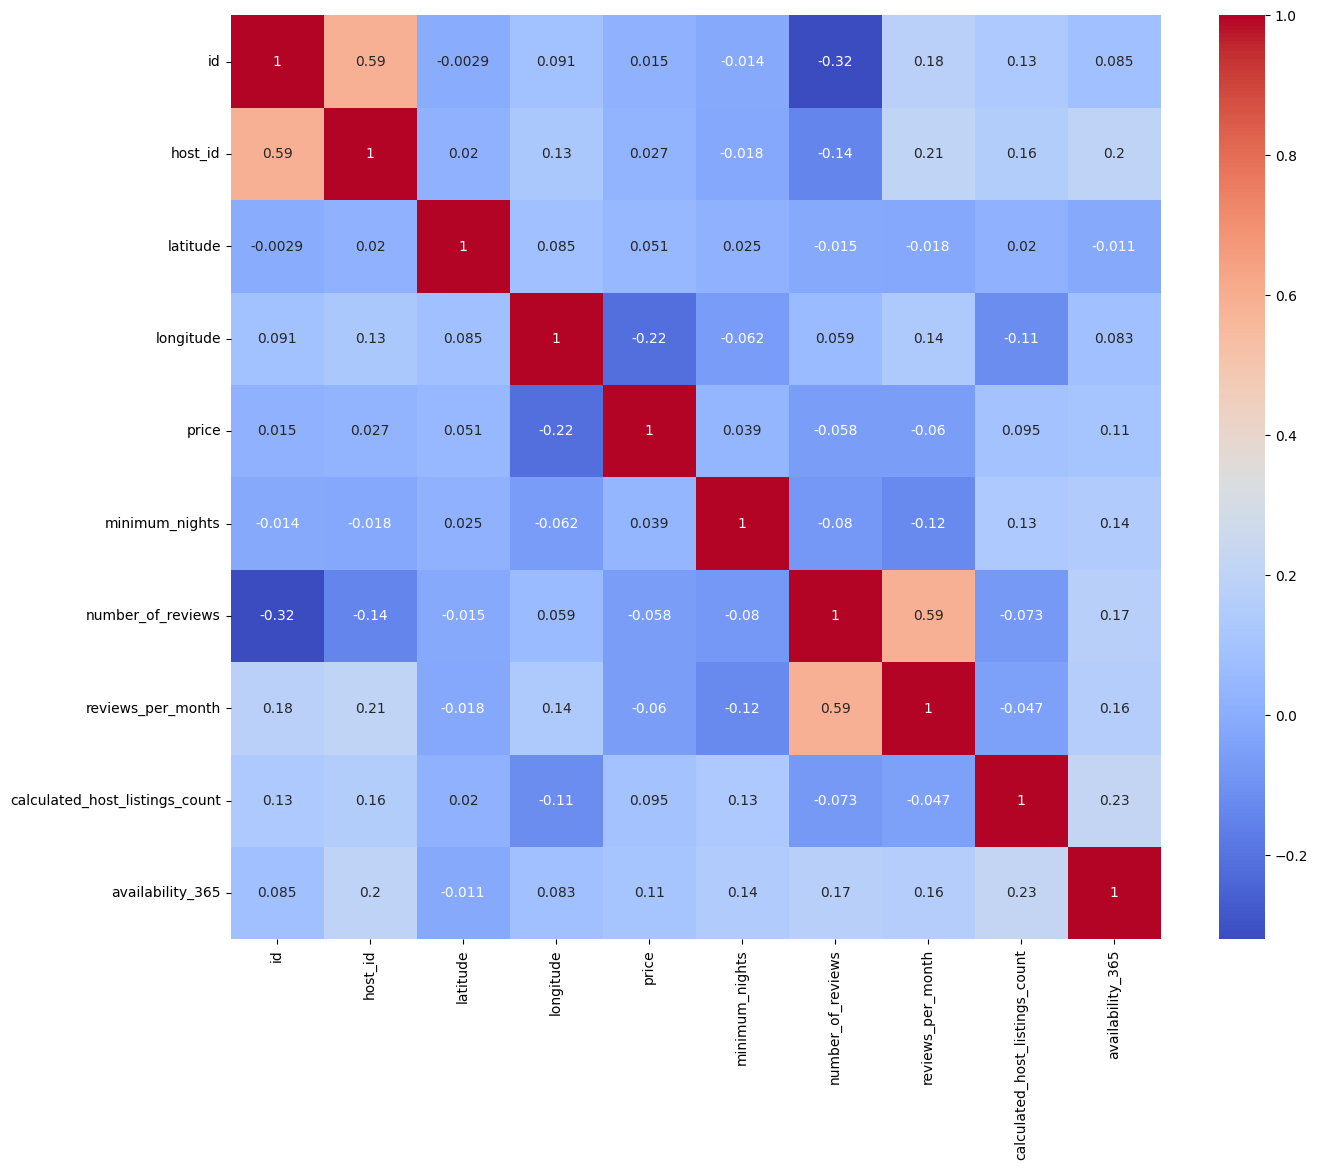

In [14]:
#Heatmap Correlation between all numerical variables
plt.figure(figsize =(15,12))
var_cor = data_final.corr()
sns.heatmap(var_cor, cbar = True, annot=True, cmap="coolwarm")

# *Based from the Heatmap*
* -1.0 to -0.5 = negatively strong correlation <br>
* -0.5 to 0.0 = negatively weak correlation <br>
* 0.0 to 0.5 = positively weak correlation <br>
* 0.5 to 1.0 = positively strong correlation <br> <br>
reviews_per_month & number_of_reviews have a strong positive coorelation value



# **DATA EXPLORATION**

## Analysis 1: What can we learn about difference hosts and areas?

### 1.1 Top 10 most listed hosts

<Axes: xlabel='host_name'>

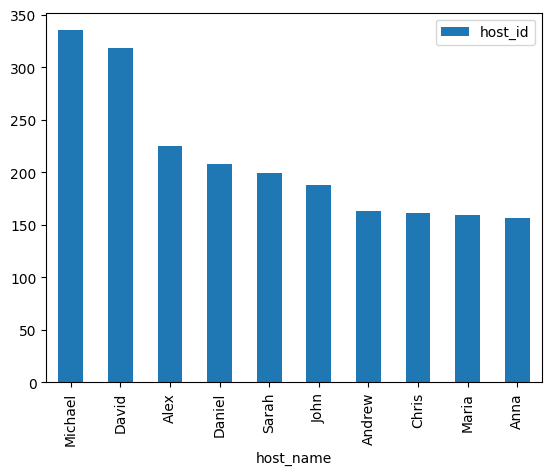

In [15]:
Host_id = data_final['host_id'].value_counts()[:10]

Most_listed_host = data_final[['host_name', 'host_id']].groupby("host_name").nunique('host_id').sort_values('host_id', ascending = False)

Most_listed_host[:10].plot(kind = 'bar')

##### *Based from the bar chart above, Michael have the highest number of listed property and followed by David compared to the other hosts.*

### 1.2 Proportion of Hosts listed in all neighbourhood group based on Host_ID

array([<Axes: ylabel='host_id'>], dtype=object)

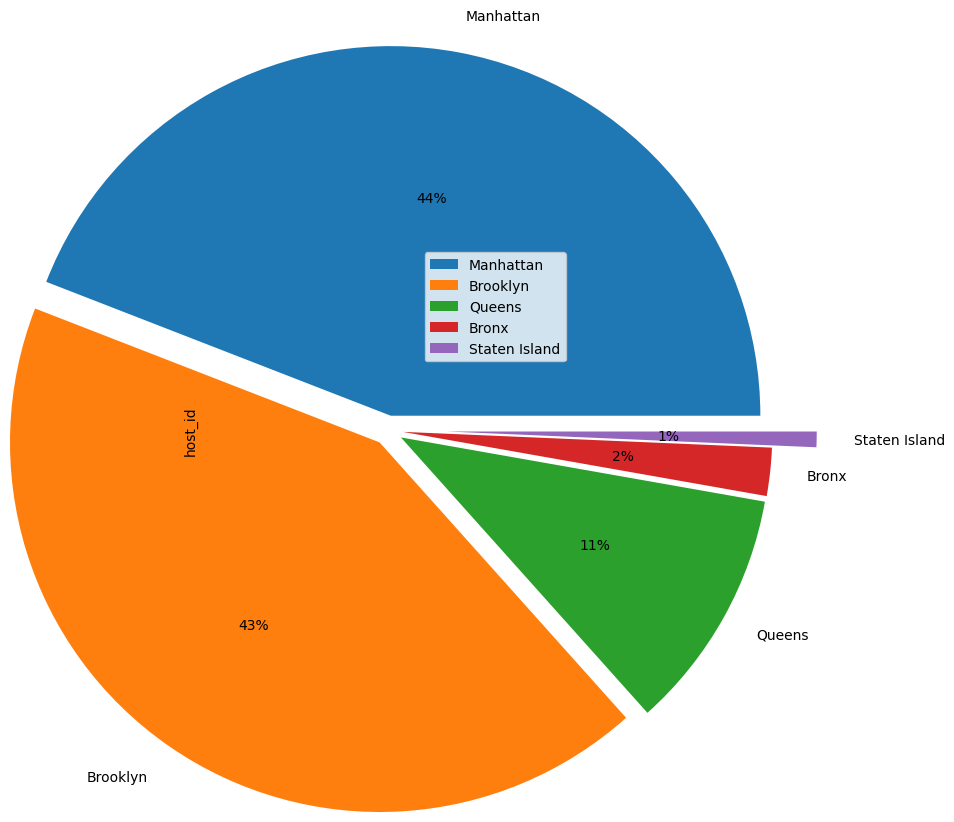

In [16]:
colors = sns.color_palette('pastel')
popular_host_areawise = data_final[['host_id','neighbourhood_group']].groupby(['neighbourhood_group']).nunique('host_id').sort_values('host_id', ascending = False)

popular_host_areawise.plot(kind = 'pie', subplots = True, radius = 2.5, autopct = '%.0f%%', explode = [0.1,0.1,0.1,0.1,0.4])

##### *From the Piechart, 44% of the listed property are located in Manhattan, and followed by Brooklyn with 43%. Staten Island has the lowest percentage with 1% from all the listed location.*

### 1.3 Number of room type based on neighbourhood group

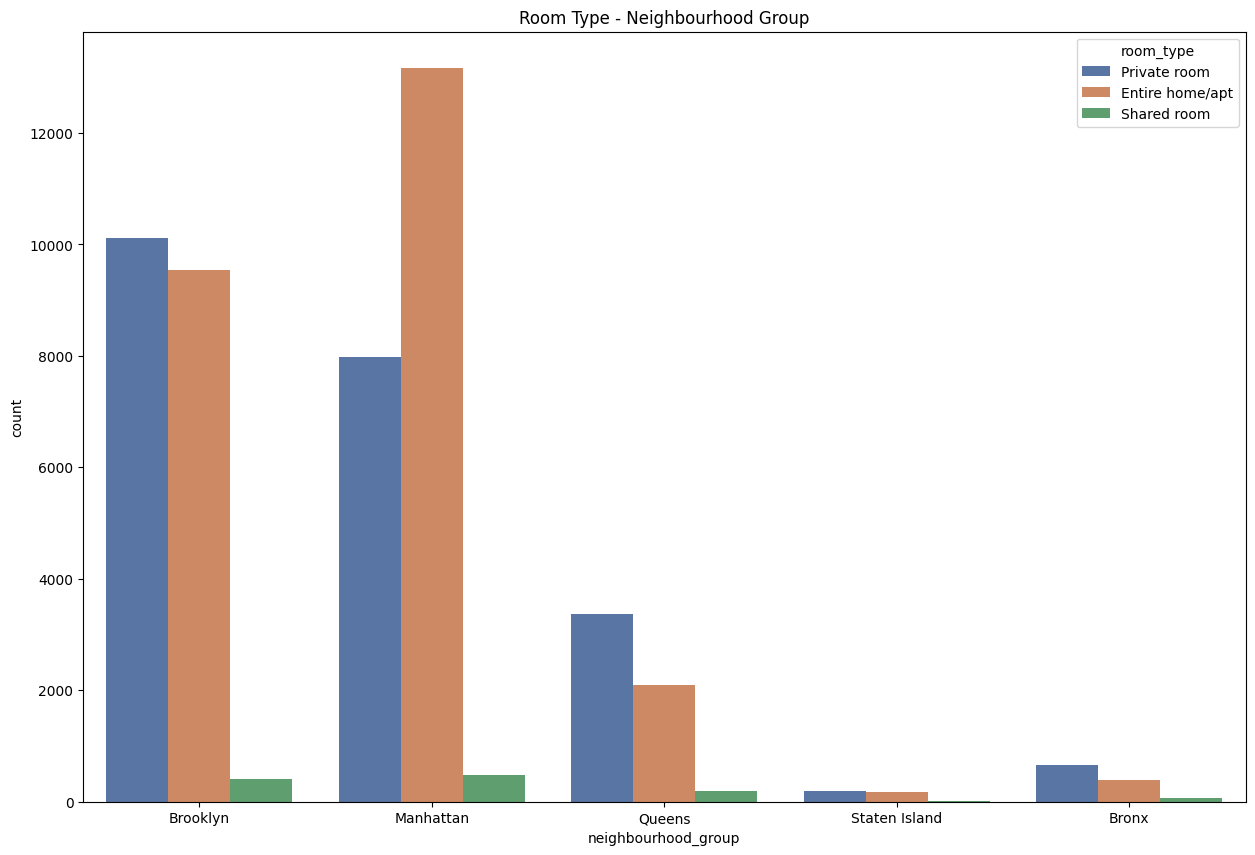

In [17]:
plt.figure(figsize=(15,10))
plt.title("Room Type - Neighbourhood Group")
sns.countplot(data_final.neighbourhood_group, hue = data_final.room_type, palette = "deep", x = data_final.neighbourhood_group)
plt.show()

##### *The Barchart displaying that the most of room with type private room are dominated in Brooklyn however, the room type with the entire home apartment are mostly located in Manhattan which exceed the number of 12000 property. Staten Island are at the bottom where the all the room type are not many in that location.*

## Analysis 2: What insight do we take from the prediction based on the data?

### 2.1 Which neighbourhood group area have the highest price?

<Axes: title={'center': 'Neighbourhood Group - Price'}, xlabel='neighbourhood_group'>

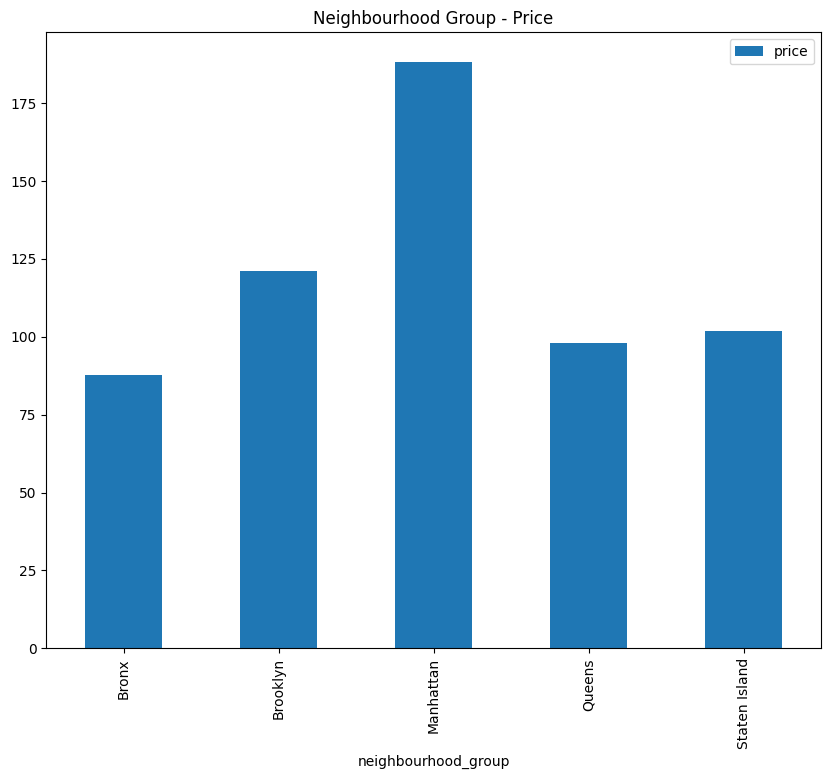

In [18]:
high_price_neighbourhood = data_final[['neighbourhood_group', 'price']].groupby('neighbourhood_group').mean()

high_price_neighbourhood.plot(kind = 'bar', title ="Neighbourhood Group - Price", figsize = (10,8))

### 2.2 Displaying the top 10 neighbourhoods that have many properties count

Text(0.5, 0, 'Count of units')

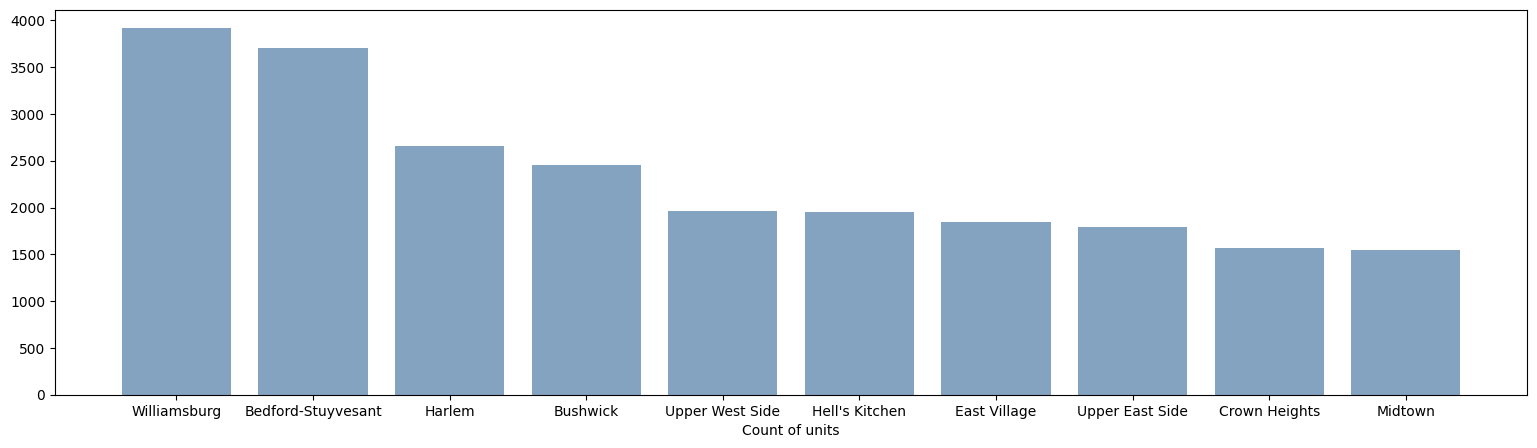

In [19]:
unit_in_neighbourhood = data_final.neighbourhood.value_counts().head(10)
unit_in_neighbourhood

x = list(unit_in_neighbourhood.index)
y = list(unit_in_neighbourhood.values)

fig = plt.figure(figsize=(19,5))
plt.bar(x,y, color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel("Count of units")

### 2.3 Displaying the neighbourhood group with top most counts of review in the data

                     number_of_reviews
neighbourhood_group                   
Bronx                             1089
Brooklyn                         20069
Manhattan                        21607
Queens                            5656
Staten Island                      371


<Axes: title={'center': 'Neighbourhood Group - Review'}, xlabel='neighbourhood_group'>

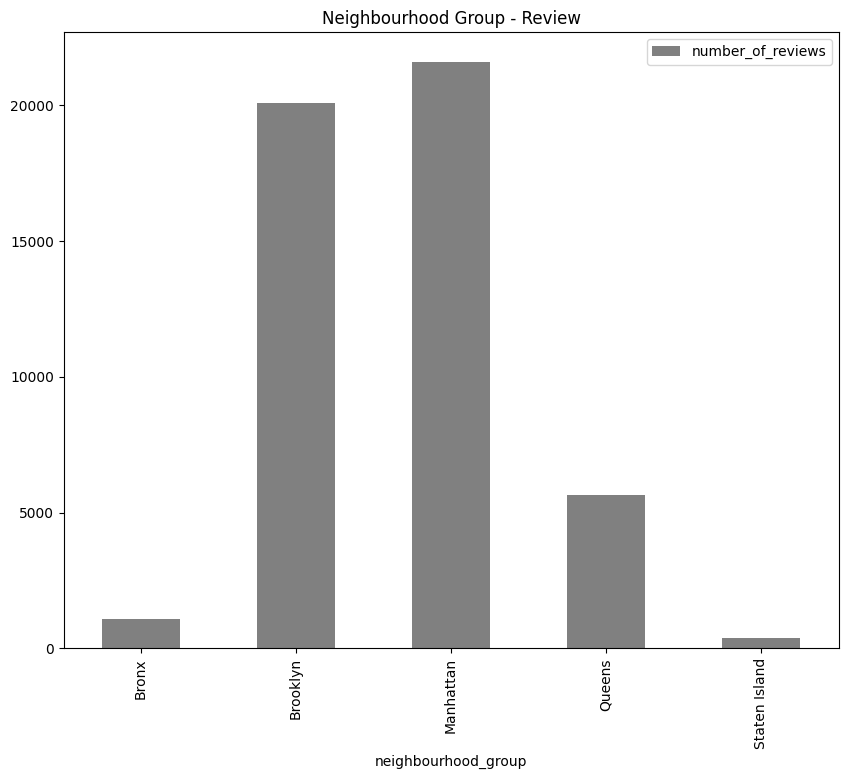

In [20]:
most_reviewed = data_final[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').count()

print(most_reviewed)


most_reviewed.plot(kind = 'bar', title = 'Neighbourhood Group - Review', figsize =(10,8), color = 'gray')

## Analysis 3: How the data could provide insight for new house owners set their price for the property

<Axes: >

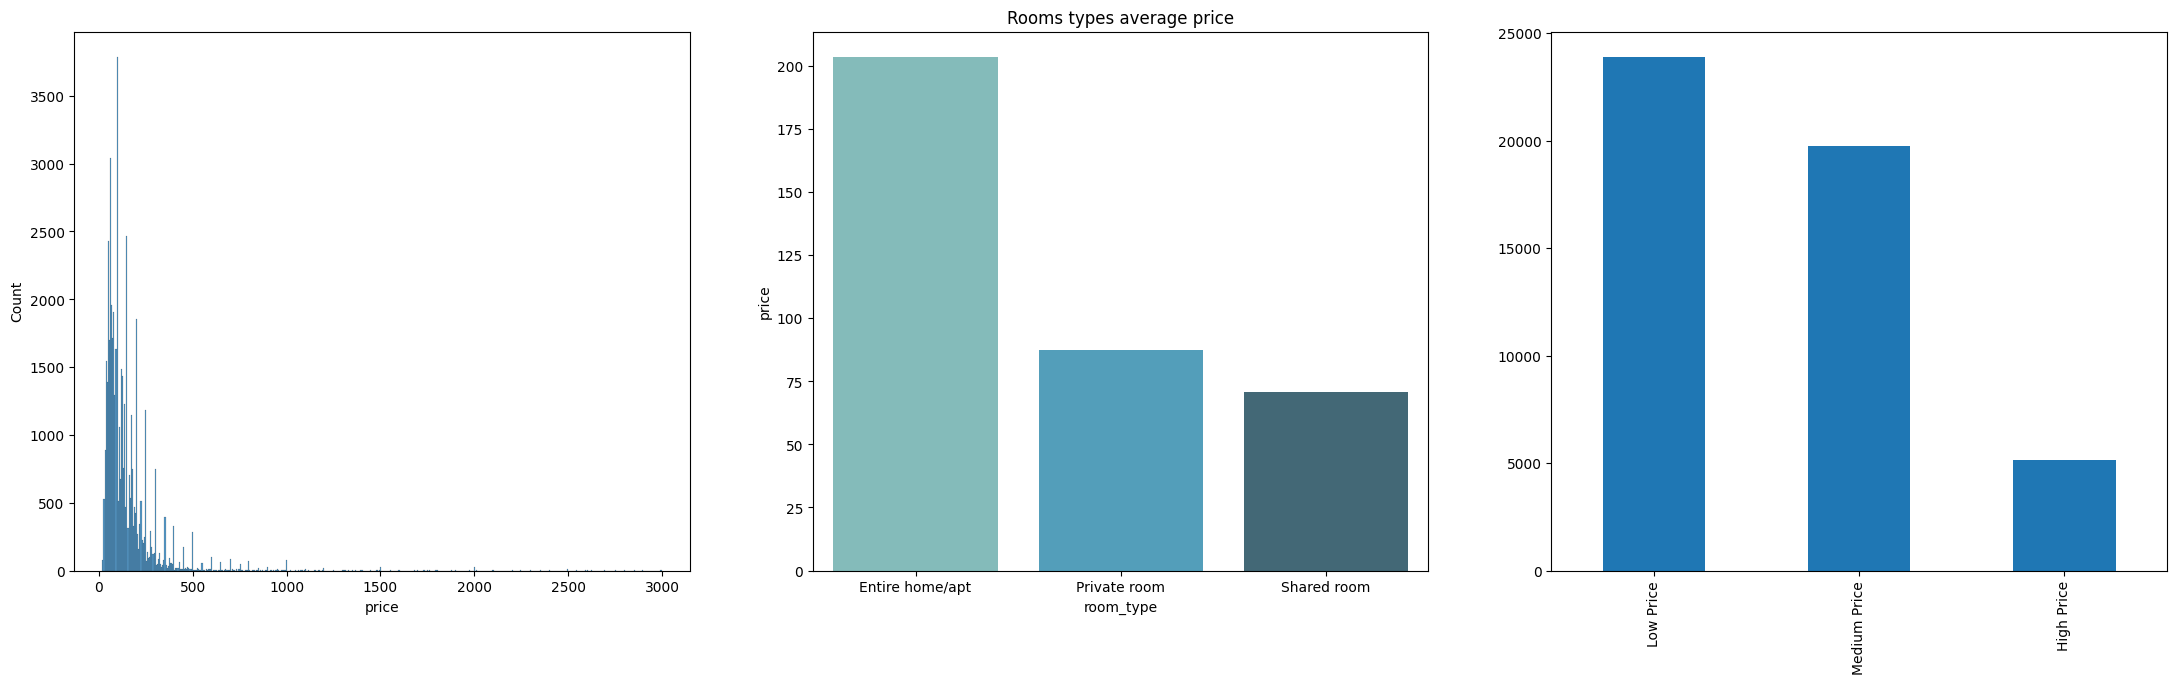

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (27,7))
ax = axes.flatten()

sns.histplot(data_final.price, ax=ax[0])

average_price = data_final.groupby('room_type', as_index = False)[['price']].mean()
sns.barplot(data = average_price, x = 'room_type', y = 'price', palette='GnBu_d', ax = ax[1])
ax[1].set_title('Rooms types average price')

def room(x):
    if x <= 100:
        return "Low Price"
    elif x <= 250:
        return "Medium Price"
    else:
        return "High Price"
pic = data_final['price'].apply(room).value_counts().plot(kind = 'bar').ax = ax[2]

pic

## Analysis 4: Which host are having most activity?

In [22]:
colors = sns.color_palette('pastel')

top_host = data_final[['host_name', 'host_id', 'number_of_reviews']].groupby(['host_id', 'host_name']).sum().sort_values('number_of_reviews', ascending = False)

top_host

,,number_of_reviews
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
...,...,...
39769788,Nico,0
39782325,Mike,0
39828340,Pascale,0


Text(0, 0.5, 'number of reviews')

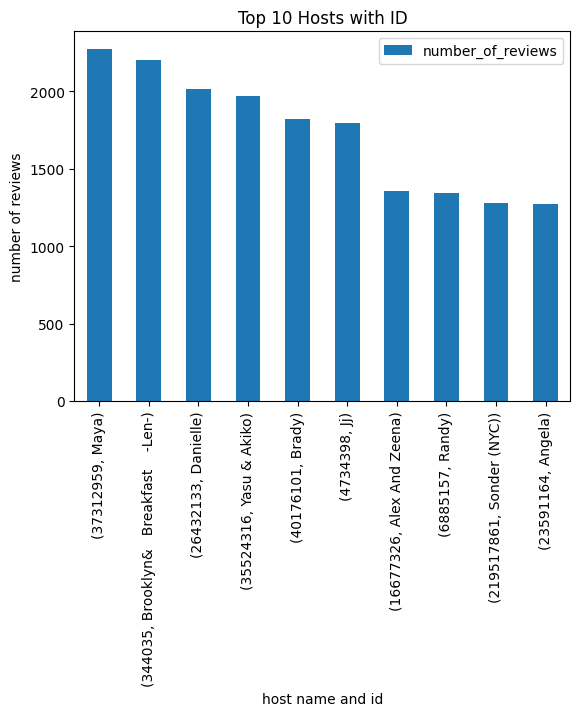

In [23]:
top_10_host = top_host[:10].plot(kind = 'bar')
plt.title('Top 10 Hosts with ID')
plt.xlabel('host name and id')
plt.ylabel('number of reviews')

## Analysis 5: Determine whether there are market impact in the different neighbourhood areas

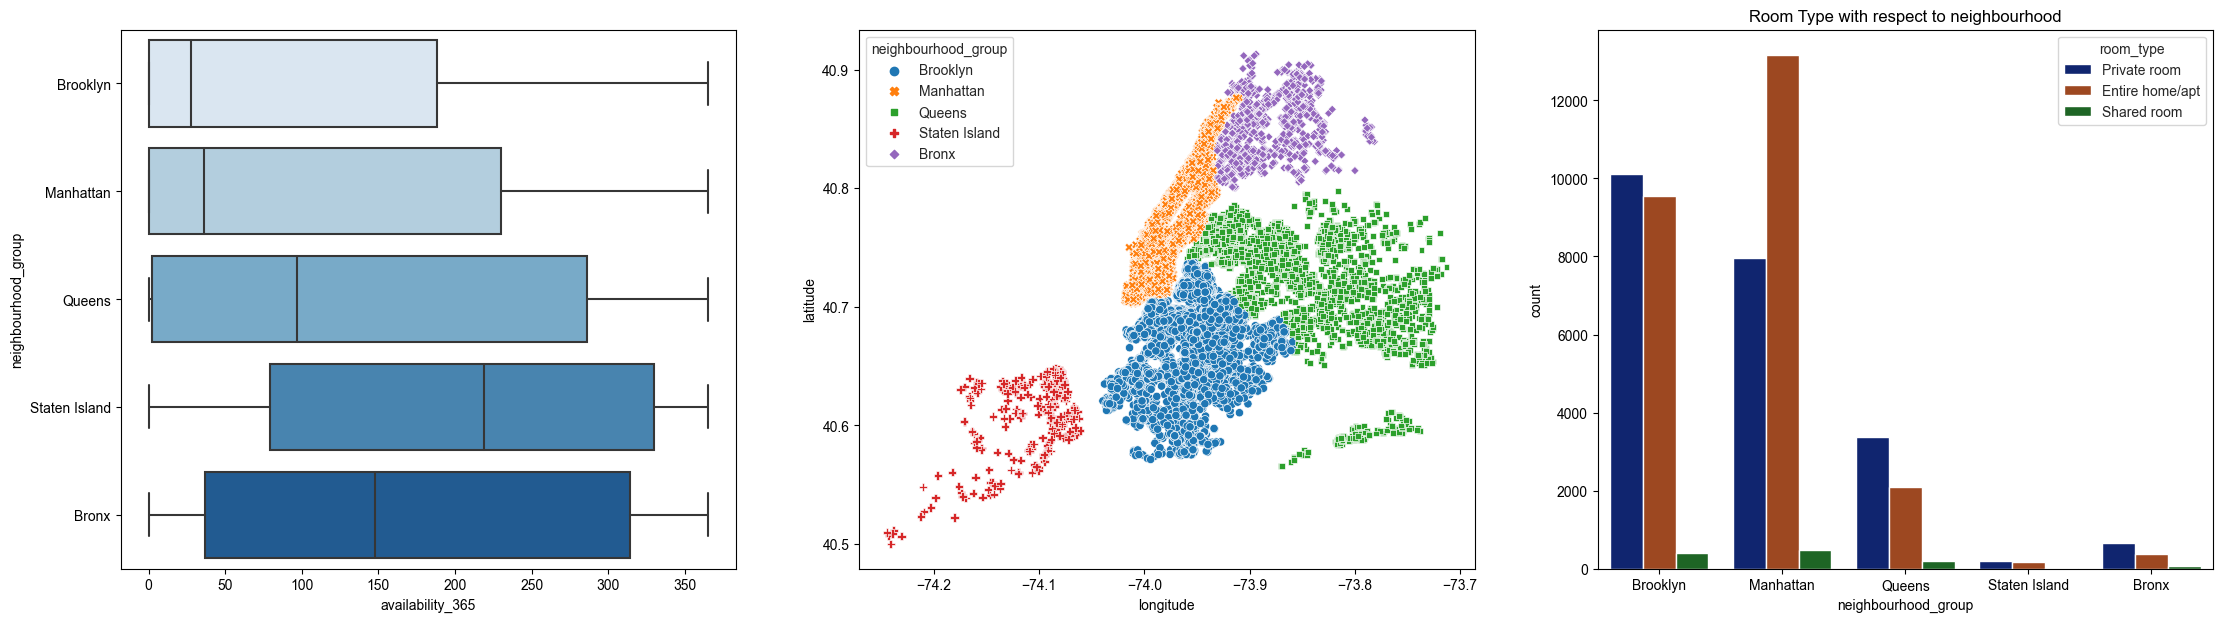

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (27,7))
ax = axes.flatten()

sns.set_style(style = 'white')
sns.boxplot(y = data_final['neighbourhood_group'], x = data_final['availability_365'], palette = "Blues", ax = ax[0])

sns.scatterplot(data = data_final, x = 'longitude',y = 'latitude',hue='neighbourhood_group',style='neighbourhood_group',ax=ax[1])

plt.title("Room Type with respect to neighbourhood")
sns.countplot(data = data_final, x = 'neighbourhood_group',hue='room_type', palette="dark")
plt.show()


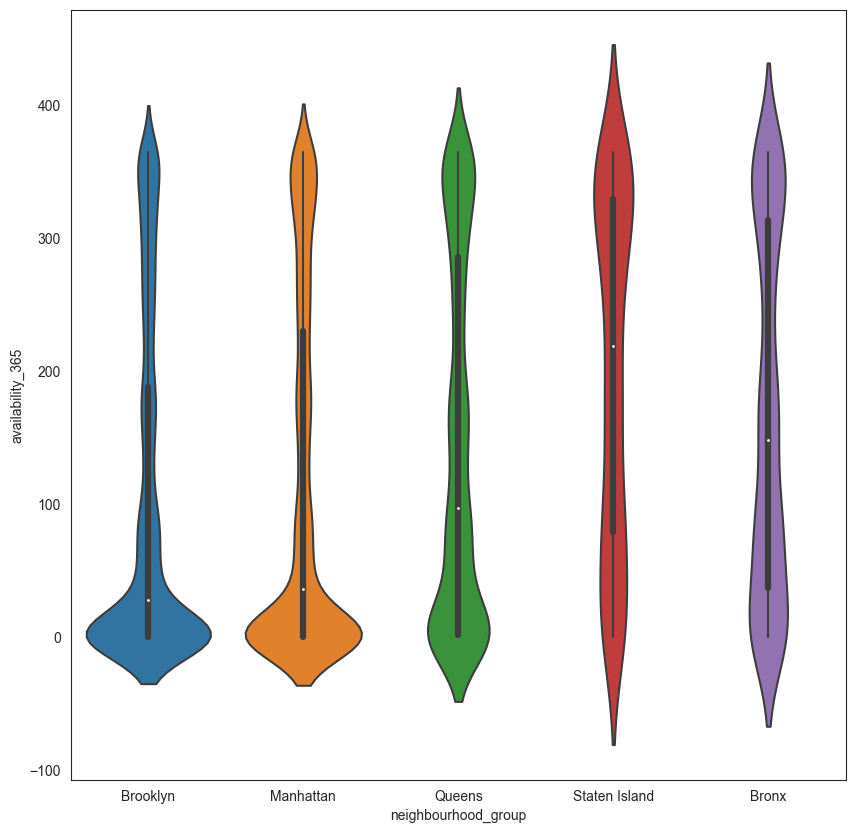

In [25]:
plt.figure(figsize=(10,10))
sns.violinplot(data=data_final, x="neighbourhood_group", y="availability_365")
plt.show()

## Analysis 6: Show the maximum and minimum price for all the neighbourgood group

<Axes: xlabel='neighbourhood_group'>

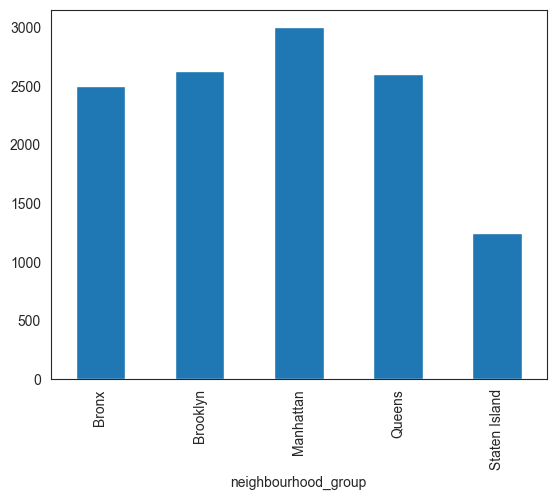

In [26]:
c = data_final.groupby(['neighbourhood_group'])['price']

max_val = c.max()
max_val

max_val.plot(kind = 'bar')

<Axes: xlabel='neighbourhood_group'>

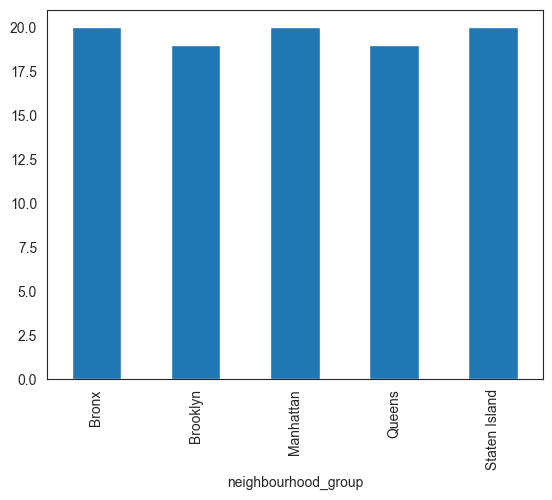

In [27]:
min_val = c.min()
min_val

min_val.plot(kind = 'bar')

<Axes: xlabel='neighbourhood_group'>

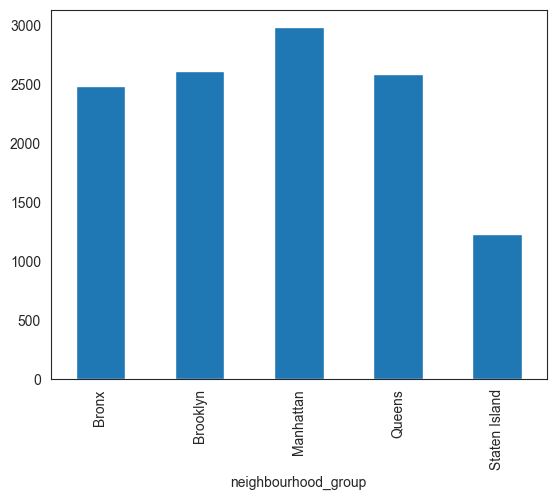

In [28]:
price_range = c.max() - c.min()
price_range

price_range.plot(kind = 'bar')

## Analysis 7: Show the price distribution based on the neighbourhood group

<Axes: xlabel='neighbourhood_group', ylabel='price'>

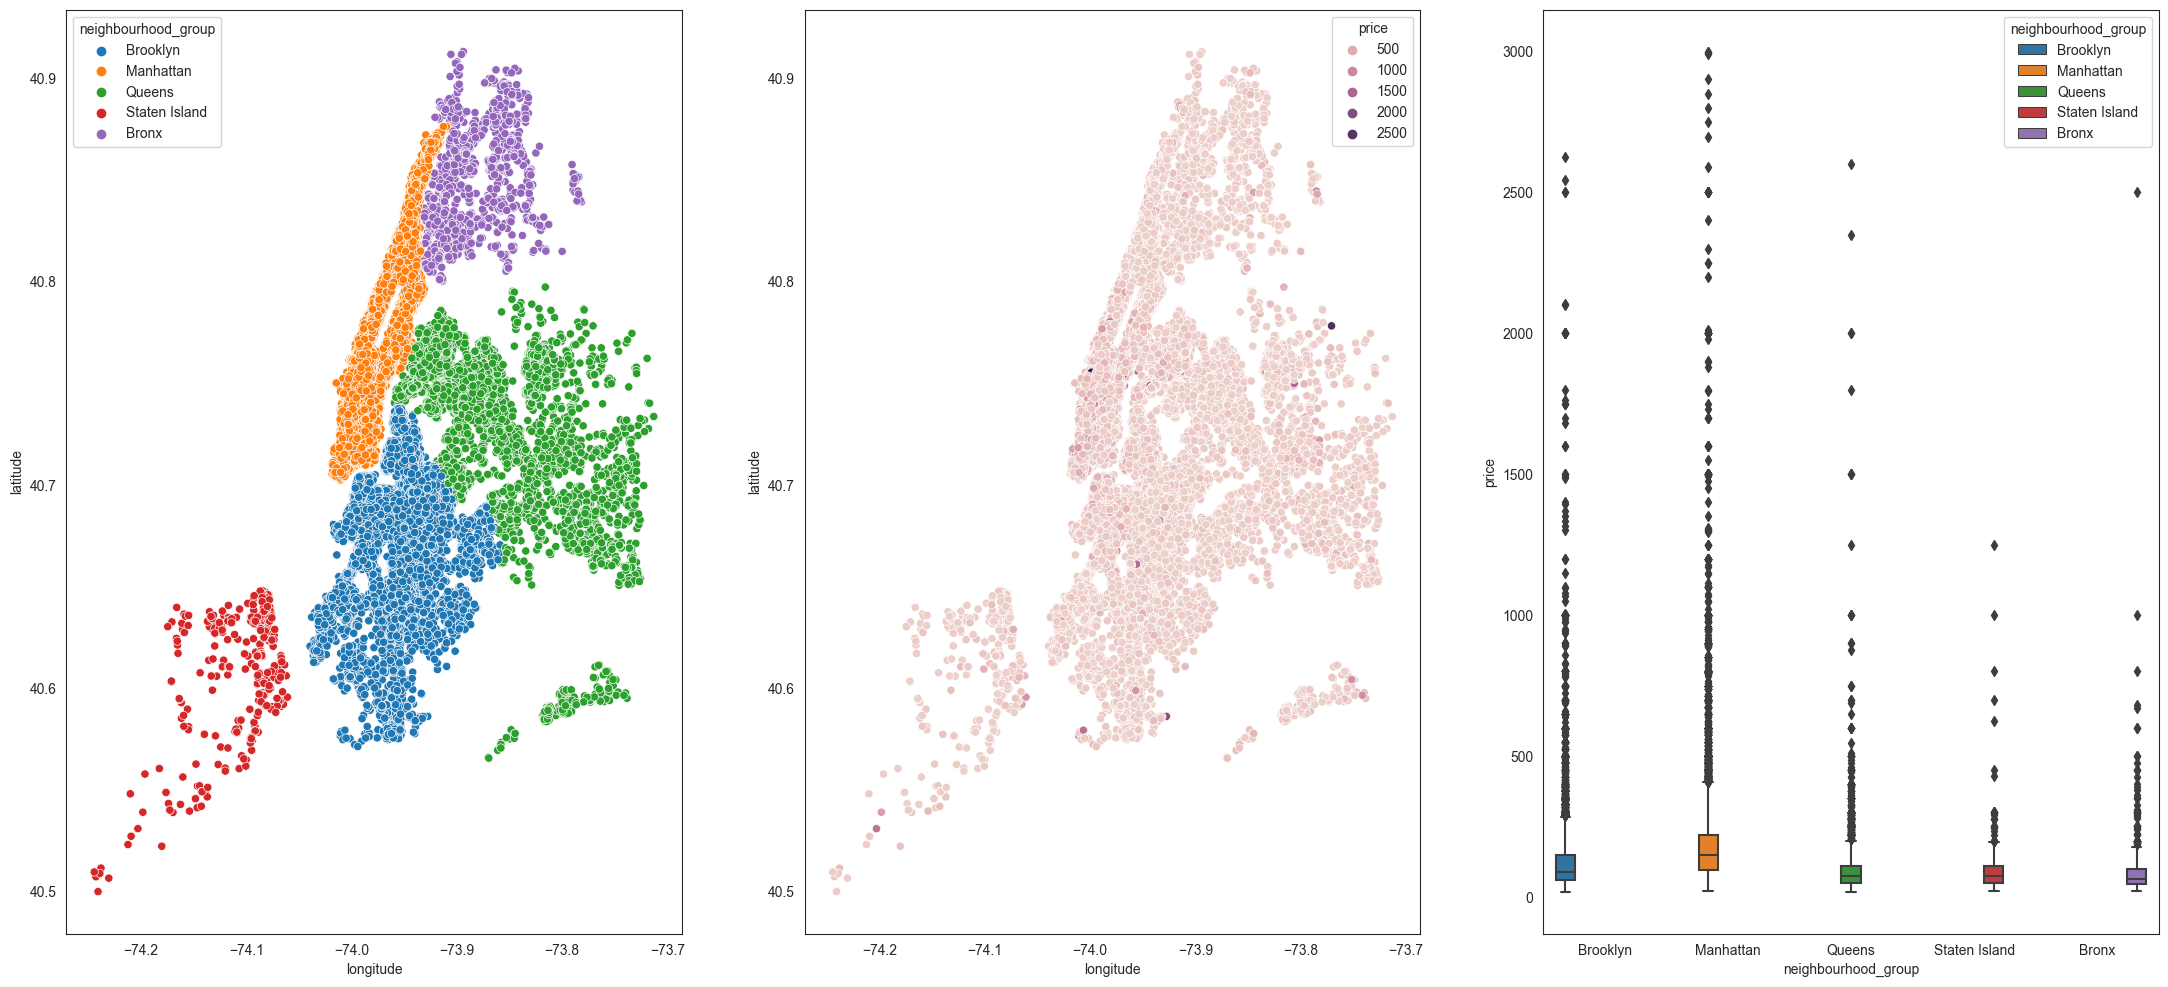

In [29]:
#7
fig, axes = plt.subplots(nrows=1,ncols=3, figsize = (27,12))
ax = axes.flatten()

sns.scatterplot(data = data_final, x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', ax = ax[0])

sns.scatterplot(data = data_final, x = 'longitude', y = 'latitude', hue = 'price', ax=ax[1])

sns.boxplot(data= data_final, x = 'neighbourhood_group', y = 'price', hue = 'neighbourhood_group' , ax=ax[2])

## Analysis 8: Which room type that is popular and have the mostly occupied unit based on the availability?

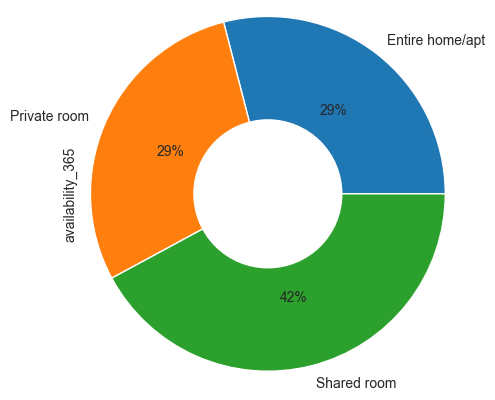

In [30]:
#8
fav_unit = data_final.groupby(['room_type'])['availability_365'].mean()
fav_unit.plot(kind = 'pie', subplots = True, radius = 1.2,autopct='%.0f%%')

circle = plt.Circle((0,0), 0.5, color = "white")
m = plt.gcf()
m.gca().add_artist(circle)